### 문제정의
- 버섯의 특징을 활용해 독/식용 분류
- 특성선택(특성중요도) 확인하기


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [4]:
pd.set_option('display.max_columns',None)

### 데이터 수집

In [5]:
# 데이터 불러오기
data = pd.read_csv('./data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
data.shape

(8124, 23)

### 데이터 전처리

In [7]:
# 정보를 확인하는 함수
# 결측지(null) 여부 확인
# 데이터 타입 문자형식 -> 전처리 필요
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
# 문제(특성)와 답 분리
X = data.iloc[:,1:]
# X = data.loc[:'cap-shape':]
y = data['poisonous']

In [9]:
display(X)
display(y)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

### 탐색적 데이터 분석(EDA)

In [10]:
# 기술통계
# count : 총 데이터 수 
# unique : 중복없이 나오는 고유한 데이터 값
# top : 가장 값이 많은 데이터 (최빈값인 항목)
# freq : 최빈 데이터의 실제수 (top의 개수, 최빈값)
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
X['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [13]:
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

#### 전처리 - 인코딩
- 범주형 -> 수치형(숫자모양)

In [25]:
# 특성 데이터에 대해서 인코딩
# 답 데이터 인코딩 필요x
X_one_hot = pd.get_dummies(X)

In [26]:
# 서식지
X['habitat'].unique()
# 딕셔너리로 숫자랑 맵핑
dict_hab ={
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7    
}
# 실제 데이터 반영 map()
#X['habitat'].map(dict_hab)

#### 훈련, 평가 셋 분리
- train_test_split(랜덤샘플링) : 1. 랜덤하게 섞고 2. 나누기
- 비율 7 : 3
- random_state : 랜덤하게 섞이는 규칙, 고정 값

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y , test_size =0.3,
                                                   random_state = 7)

In [29]:
print('훈련용 문제 : ',X_train.shape)
print('훈련용 답 : ',y_train.shape)
print('평가용 문제 : ',X_test.shape)
print('평가용 답 : ', y_test.shape)

훈련용 문제 :  (5686, 117)
훈련용 답 :  (5686,)
평가용 문제 :  (2438, 117)
평가용 답 :  (2438,)


### 모델 선택 및 학습

In [30]:
# 모델링
# 객체 생성
tree_model = DecisionTreeClassifier()
# 과대적합을 제어 X-default

In [31]:
DecisionTreeClassifier?

In [32]:
# 학습, fit
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
# 예측, predict

In [35]:
# 정확도 확인, accuracyt_score
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test)

1.0

### 교차검증(여러번 검증)
- 개념 : 일반화 성능 측정 방법 -> 모든데이터에 대해 모델이 얼마나 잘 맞추는지 확인,한번 평가하는 것 보다 안정적
- 방법 : 훈련세트와 평가세트(검증용) 여러겹 나눠서 평가
- 모델 객체 정의하고 난 후에 (학습 전) 정확도가 어느정도일지 확인

                                

In [36]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(tree_model,X_train,y_train,cv=5)

In [39]:
print ('교차검증 결과 : ',result)
print('교차검증 정확도 평균 : ',result.mean())

교차검증 결과 :  [1.         1.         1.         0.99912049 1.        ]
교차검증 정확도 평균 :  0.9998240985048372


### 특성별 중요도 확인

In [49]:
# 학습이 진행된 후 확인
# 중요도를 배열형태로 반환
importance_values = tree_model.feature_importances_

im_df = pd.DataFrame(importance_values, index=X_one_hot.columns ,columns=['importance'])
im_df_top = im_df.sort_values(by='importance',ascending=False)
im_df_top

,importance
odor_n,0.608902
stalk-root_c,0.181454
stalk-root_r,0.084697
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000


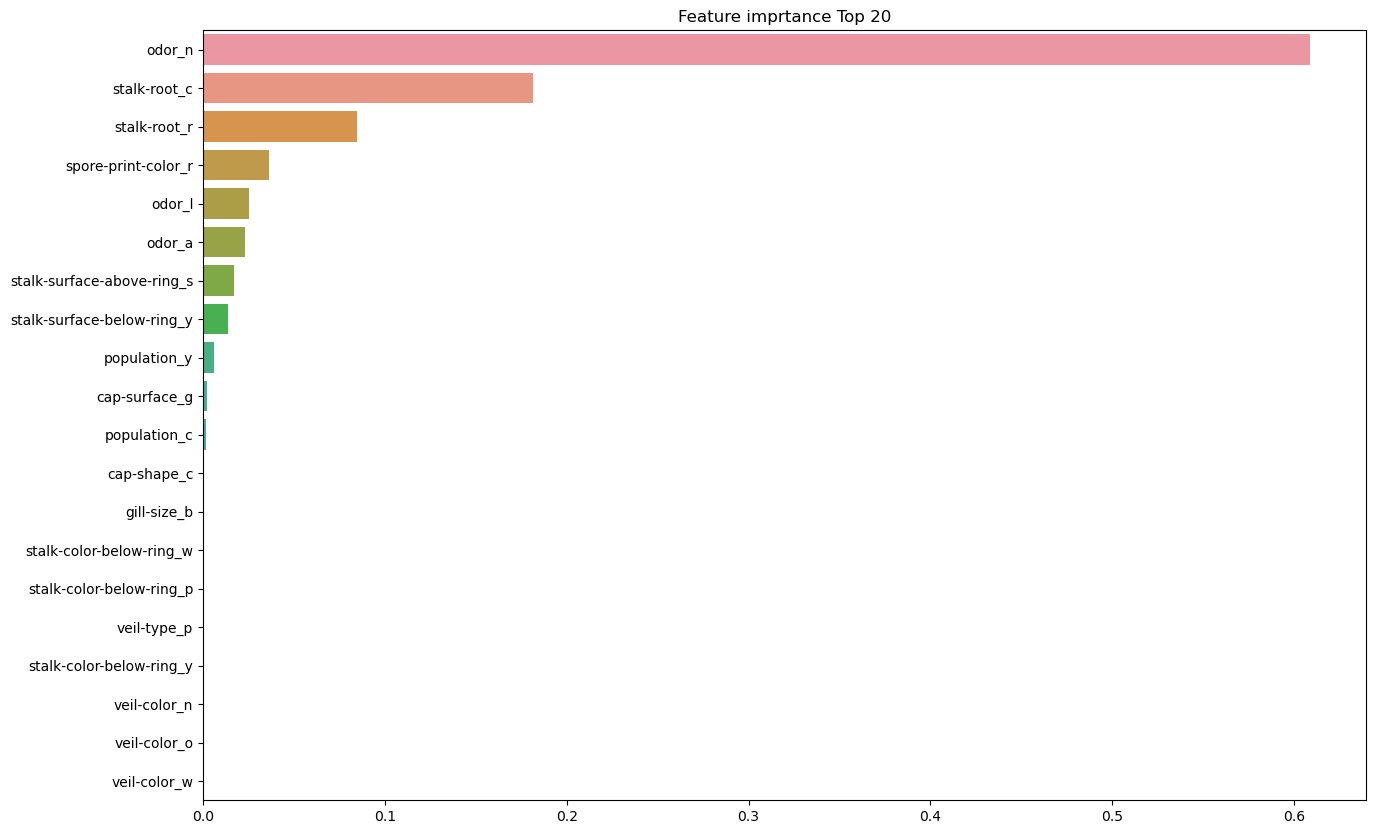

In [54]:
# 시각화 라이브러리 seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# 정렬과 시각화를 쉽게 하기 위해 series 전환
im_series = pd.Series(importance_values, index=X_one_hot.columns)
im_top20 = im_series.sort_values(ascending=False)[:20]

# 특성 중요도 시각화
plt.figure(figsize=(15,10))
plt.title('Feature imprtance Top 20')
sns.barplot(x=im_top20,y=im_top20.index)
plt.show()